<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S6_2_FastAI_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fast AI 101

## Ce que vous apprendrez dans ce cours

Lorsque l'on fait du deep learning, vous avez plusieurs technologies que vous pouvez utiliser. Parmi elles sont _Tensorflow_ de Google et _Pytorch_ de Facebook.

Au dessus de ces technologies ont été construits des librairies qui sont respectivement _Keras_ et _FastAi_. Ces librairies visent à faciliter l'utilisation des réseaux de neurones sur des dataset volumineux.

Dans ce cours, vous apprendrez à utiliser _FastAi_ qui est une des librairies phare.

## Grands principes de fonctionnement de la librairie

FastAI est une librairie qui fonctionne assez différemment de ce que vous avez pu voir auparavant avec Scikit Learn ou Pandas. C'est pour cela qu'il est bien d'en comprendre les principes fondamentaux avant d'aller dans le détails.

### Le processus d'entrainement d'un modèle

Maintenant que vous connaissez le principe du Machine Learning, vous savez que l'on passe toujours par les étapes suivantes :

1. Pre-processing : préparer les données à l'entrainement
2. Entrainement du modèle
3. Evaluation du modèle 

FastAI essaie de suivre ce même processus. Vous allez : 

1. Faire votre preprocessing & importer vos données via un ```DataBunch```
2. Vous créerez un modèle 
3. Vous entrainerez un modèle 
4. Vous évaluerez votre modèle 


Voyons cela sur un exemple simple 

#### Importer des données 
 
Pour commencer, on peut importer des [données déjà présentes dans Fast AI](https://docs.fast.ai/datasets.html) via ```URLs.quelque_chose``` 


In [0]:
from fastai.vision import *

path = untar_data(URLs.MNIST_SAMPLE)
data = ImageDataBunch.from_folder(path)

In [0]:
data

ImageDataBunch;

Train: LabelList (12396 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_sample;

Valid: LabelList (2038 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_sample;

Test: None

L'output ```data``` n'est pas commun mais il décrit ce que contient votre dataset. Nous voyons par exemple que nous avons un Train set qui contient des images en trois dimensions où la target ```y``` contient que des ```7```

Si vous souhaitez voir une partie de votre données, vous pouvez faire :

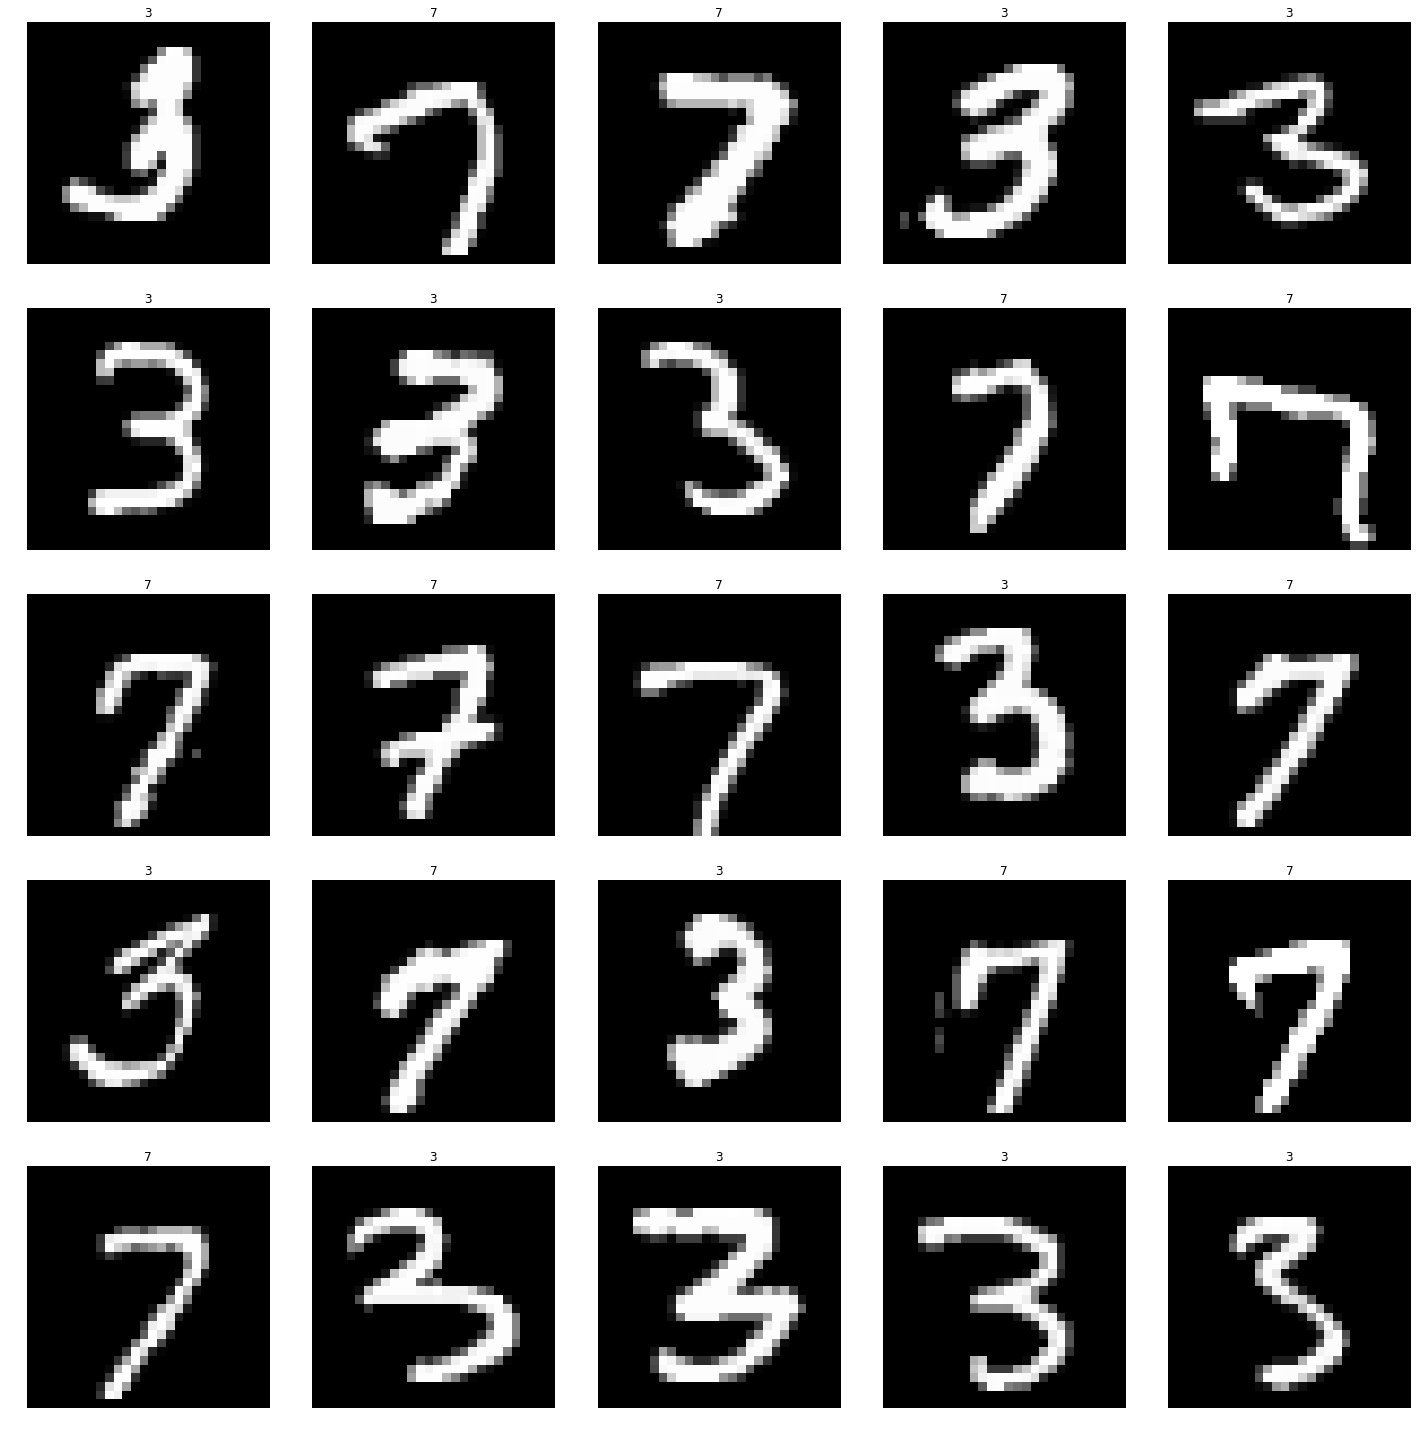

In [10]:
data.show_batch()

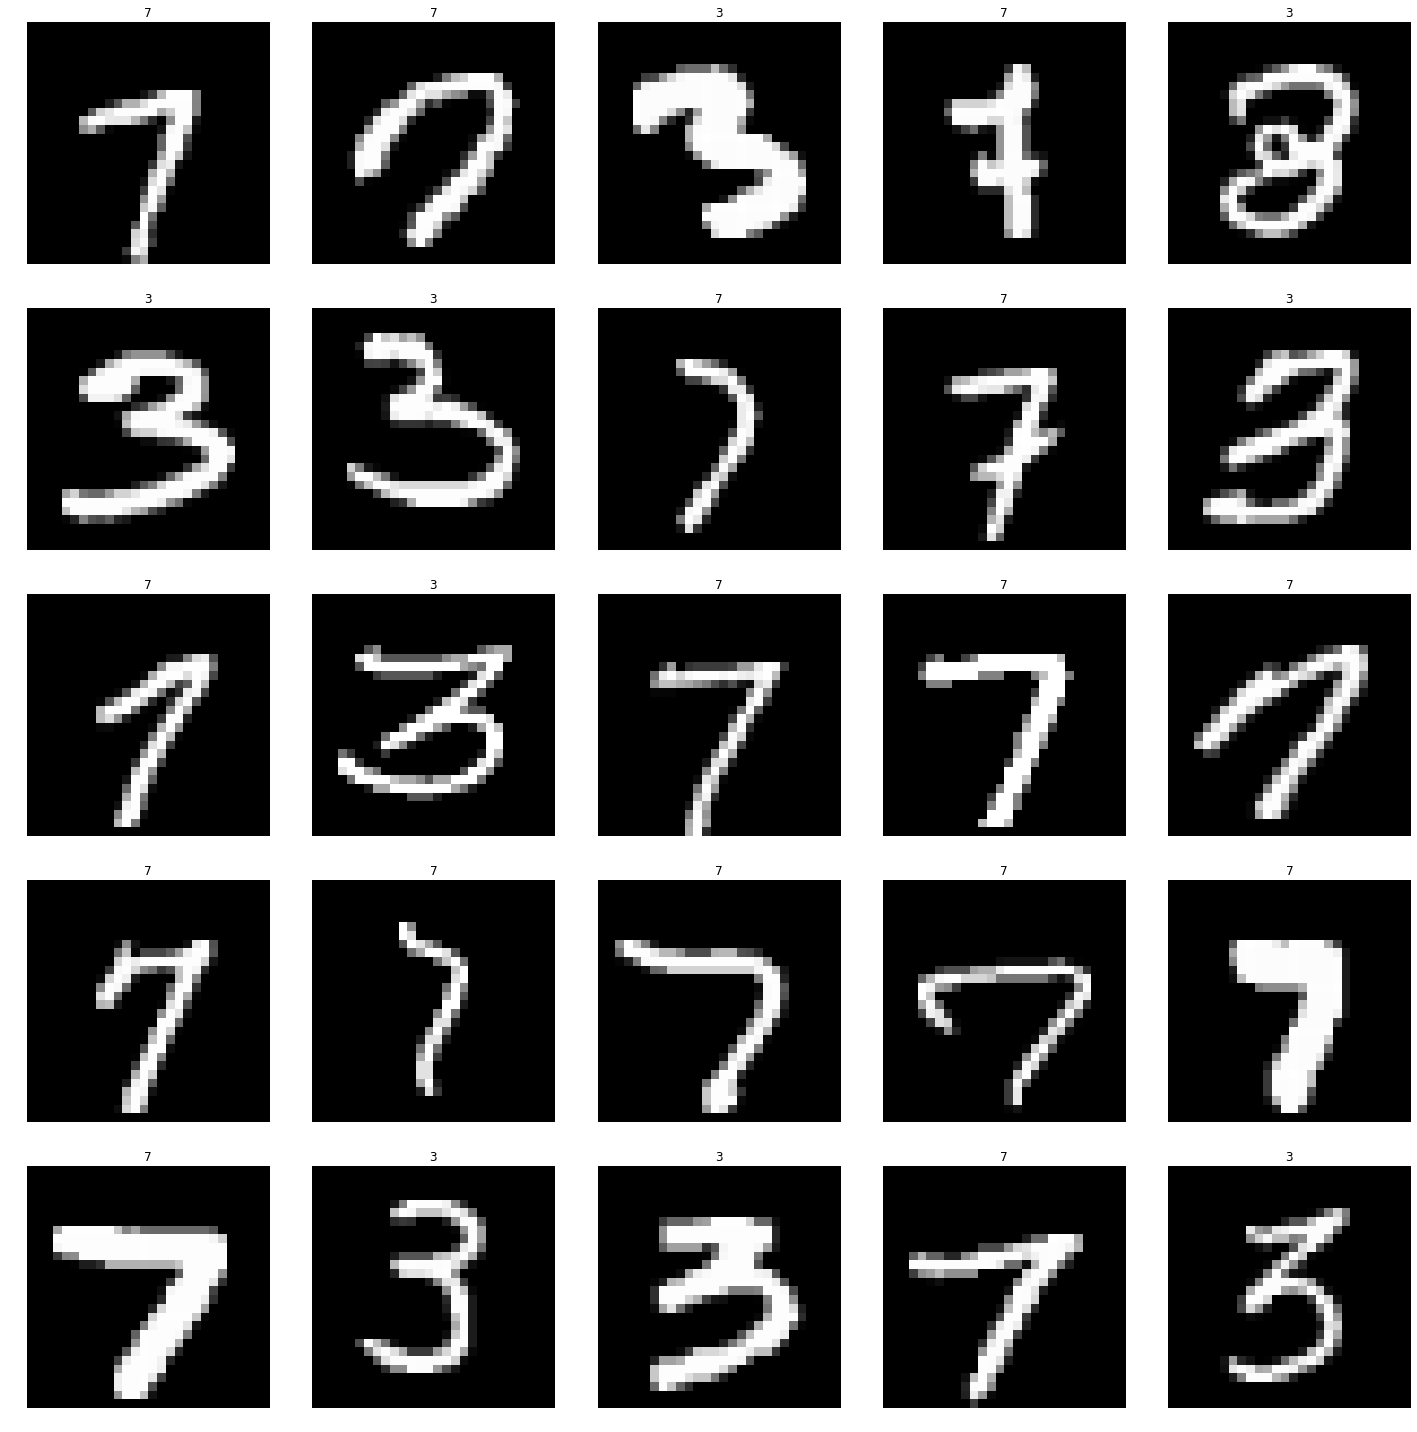

In [0]:
data.show_batch()

### Créer un modèle 

Pour créer un modèle, nous avons besoin d'instancier ce qu'on appelle un ```learner```. Il y a plusieurs types de ```learner``` en fonction du réseau de neurones que vous souhaitez utiliser. Prenons un exemple : 

In [3]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:01<00:00, 45.9MB/s]


Ici, nous créeons un réseau de neurone convolutif (CNN) dont vous verrez les grands principes plus tard dans le cours. 

Nous importons aussi une structure déjà existante qui ```resnet18```. Vous avez pleins d'autres structures de modèles connues dans FastAI dont nous ferons la liste plus bas. 

Enfin nous ajoutons la metric ```accuracy``` car nous souhaitons voir la performance de notre modèle sur les données d'entraînement 

### Entrainer le modèle 

Pour entrainer votre modèle, rien de plus simple. Vous pouvez utiliser la méthode suivante : 

In [4]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.233219,0.118263,0.957311,00:11
1,0.118145,0.073009,0.973503,00:09
2,0.075324,0.070010,0.977920,00:09


In [0]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.186676,0.122428,0.959764,01:33
1,0.089170,0.070859,0.976938,01:33
2,0.070624,0.064809,0.976938,01:33


Ce processus peut prendre du temps, voire **beaucoup** de temps mais vous finirez par voir plusieurs metrics dont : 

1. ```Train_loss``` & ```Valid_loss``` qui correspond à votre fonction de coût 

2. ```accuracy``` qui est le % de bonnes prédictions sur les données de test 

### Evaluer votre modèle 

Pour évaluer votre modèle, vous pouvez regarder quelques prédictions 

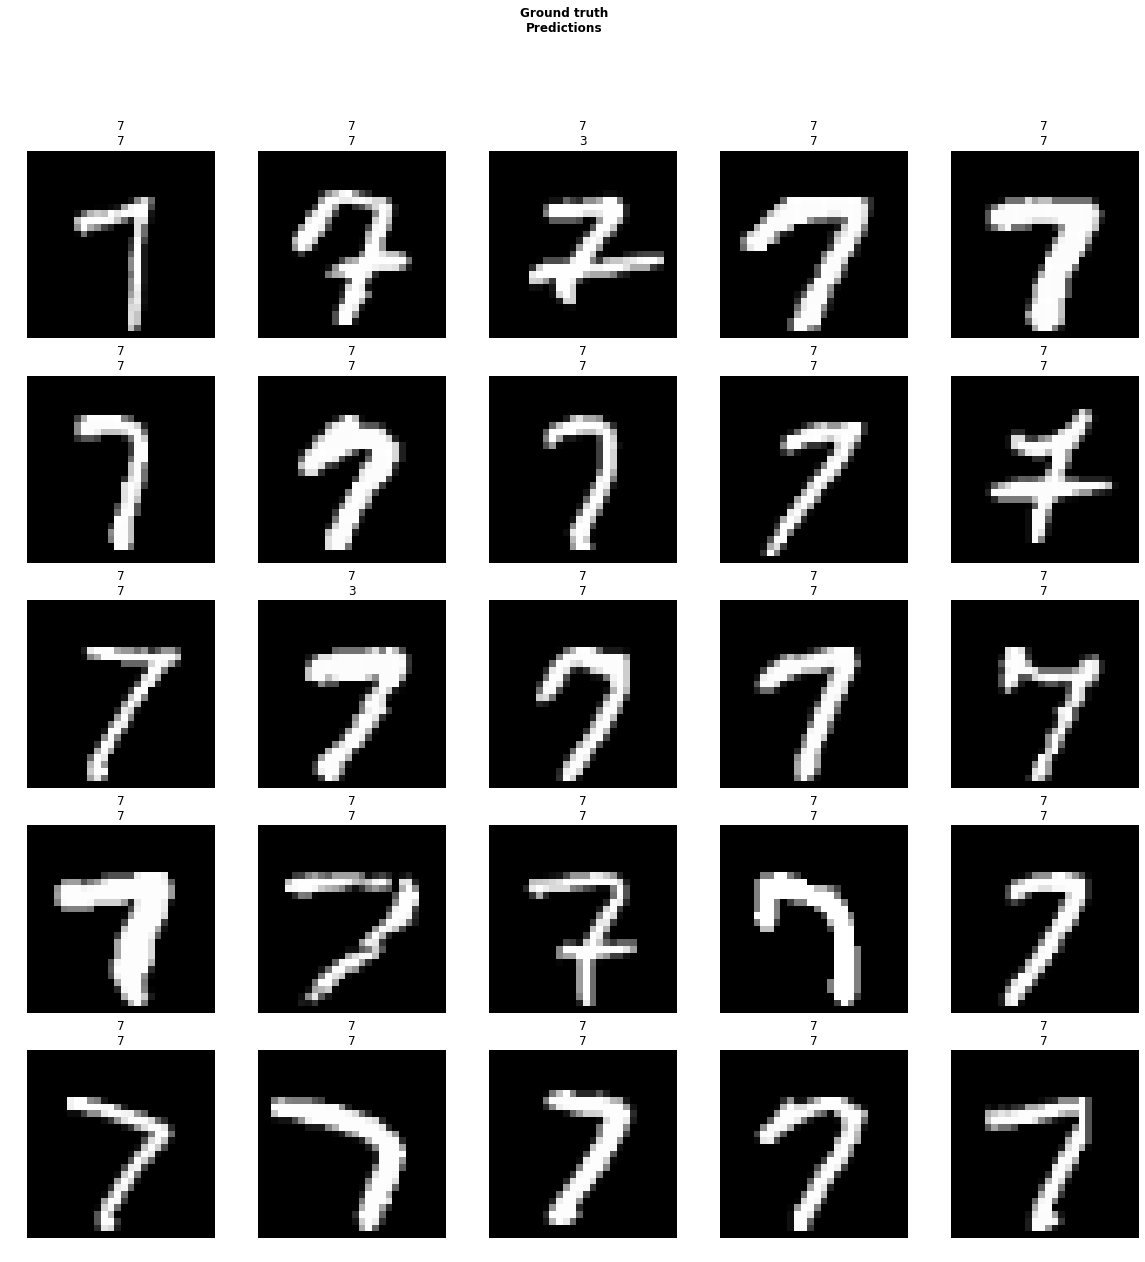

In [5]:
learn.show_results()

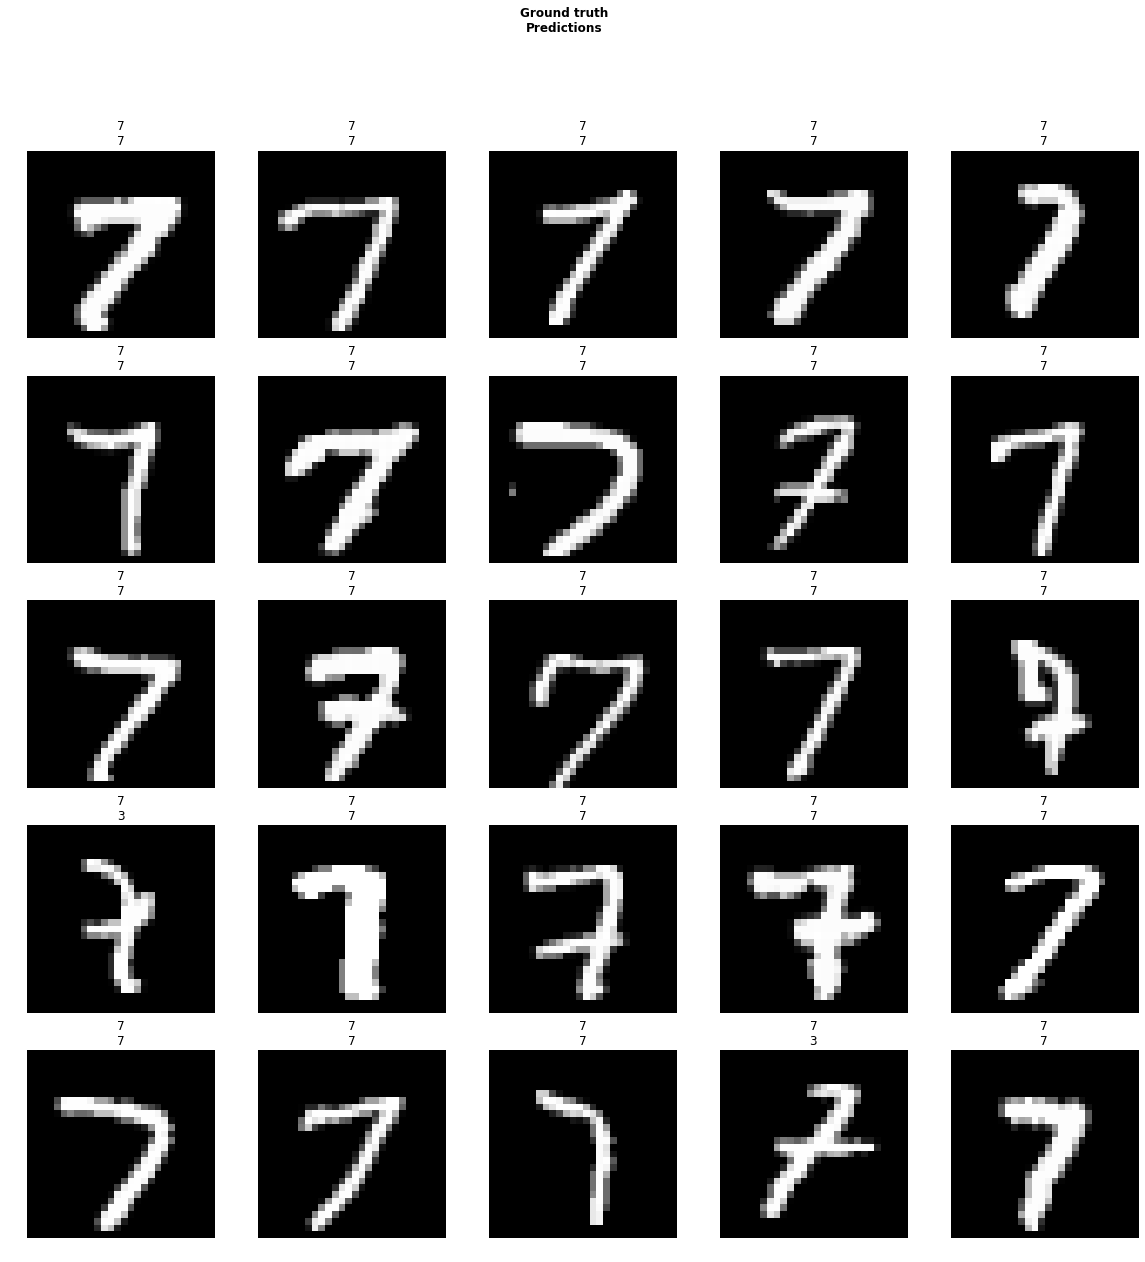

In [0]:
learn.show_results()

On peut voir que le modèle performe bien, cependant ce n'est pas la meilleure manière de voir la chose. Nous avons notamment appris à utiliser des matrices de confusions. Pour cela, vous aurez besoin d'utiliser un ```interpretor```. 

De la même manière que les ```learner```, il y a un ```interpretor``` différent en fonction de vos problématiques 

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

Cette fois, vous pouvez visualiser une matrice de confusion 

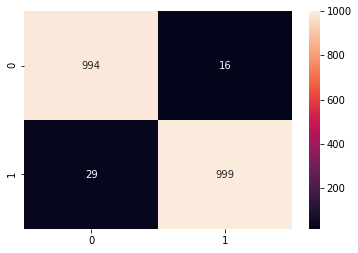

In [7]:
import seaborn as sns
sns.heatmap(interp.confusion_matrix(), annot=True, fmt="d")

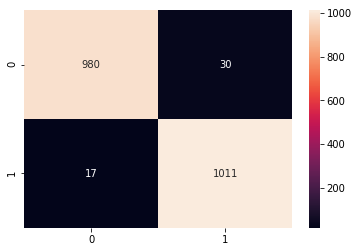

In [0]:
import seaborn as sns
sns.heatmap(interp.confusion_matrix(), annot=True, fmt="d")

### Raffiner votre modèle 

Pour terminer, vous pouvez raffiner votre modèle en l'entraînant plus et tatonnant sur le ```learning rate```. Pour cela, on peut faire la chose suivante : 

In [8]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.53E-07
Min loss divided by 10: 8.11E-08


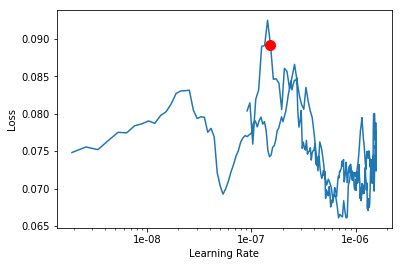

In [17]:
learn.recorder.plot(suggestion=True)

Min numerical gradient: 6.31E-07


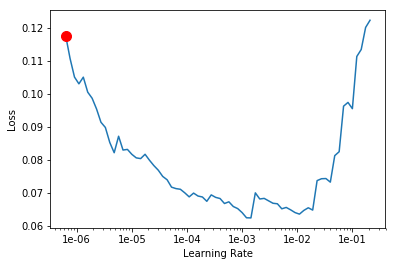

In [0]:
learn.recorder.plot(suggestion=True)

FastAI, nous suggère un ```learning rate``` à 6.31E-07. Continuons donc d'entrainer le modèle la dessus 

In [11]:
learn.fit_one_cycle(2, max_lr=1.58E-06)

epoch,train_loss,valid_loss,accuracy,time
0,0.070746,0.072682,0.976938,00:10
1,0.074358,0.066318,0.977920,00:10


In [0]:
learn.fit_one_cycle(2, max_lr=6.31E-07)

epoch,train_loss,valid_loss,accuracy,time
0,0.064080,0.063470,0.976938,01:33
1,0.070308,0.065008,0.977429,01:34


Nos performances se sont encore améliorer pour arriver à presque 98% d'accuracy. 

## Les scénarii d'utilisations de FastAi 

Nous avons vu notre premier exemple d'utilisation au dessus sur de la détection d'image mais FastAi ne fait, bien sûr, pas uniquement ceci. Voici un tableau récapitulatif de ce que vous pourrez faire avec la librairie 

|Scenario|Explication|
|--------------|---------|
|Vision|  Ceci regroupe tout ce qui est gestion d'images. Par exemple, vous pouvez faire de la détection d'objets dans une image, de la segmentation ou même de la création d'images.|
|Text|Très communément appelé NLP pour Natural Language Processing, ceci est pour ce qui est relatif à la compréhension d'un texte. Par exemple, on peut faire de l'analyse de sentiment pour comprendre à partir d'une phrase écrite ce qu'une personne pense d'un produit. Le cas le plus connu est d'essayer de prédire la note d'un restaurant en fonction du commentaire qu'a laissé la personne.|
|Tabular|Ceci correspond à ce qu'on a fait beaucoup dans la partie Machine Learning. Ce sont des prédictions à partir de tableaux|
|Collab|C'est une contraction pour _Collaborative Filtering_ qui est relatif à la création de moteurs de recommendations|



Nous avons vu dans un mouchoir de poche comment fonctionne la librairie et ce qu'on peut faire avec. La suite de ce cours va aller plus en détail sur chacune des parties du processus. 

## Importer des données 

Comme nous l'avons vu plus haut, nous pouvons préparer nos données à l'entrainement via un ```DataBunch```. Vous pouvez en créer un de toutes pièces ou vous pouvez utiliser des ```DataBunch``` préfaits en fonction des différents scénarii que nous avons vu au dessus. Commençons par le plus simple et voir des ```DataBunch``` préfaits. 

## DataBunch préfaits 

En fonction des scénarii de ce que vous souhaitez faire, vous aurez plusieurs DataBunch préfait. Voici un tableau qui les récapitule

|Scénario|DataBunch|
|--------------|------------------|
|Gestion d'images| ```ImageDataBunch```|
|Classification de textes (analyse de sentiments)|```TextClasDataBunch```|
|Language Modeler (Prédire le prochain mot dans une phrase)| ```TextLMDataBunch```|
|Données tabulaires|```TabularDataBunch```|
|Collaborative Filtering| ```CollabDataBunch```|



Ce ```DataBunch``` est là pour contenir tout vos besoins en preprocessing pour que vous puissiez le mettre dans un modèle. Avant de pouvoir lancer quoique ce soit, vous devrez cependant définir où se trouvent vos données. Pour cela, FastAi a pensé différentes sources de données possibles 

|Source de données|Methode|
|------------------------------|--------------|
|Des dossiers| ```from_folder()```|
|Des DataFrames| ```from_df()```|
|Des fichiers csv| ```from_csv()```|


Voyons quelques exemples :

### Importer ImageDataBunch depuis un dossier 

In [0]:
path = untar_data(URLs.MNIST_SAMPLE)
path

PosixPath('/root/.fastai/data/mnist_sample')

In [0]:
data = ImageDataBunch.from_folder(path)
data

ImageDataBunch;

Train: LabelList (12396 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_sample;

Valid: LabelList (2038 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_sample;

Test: None

### Importer du texte depuis un DataFrame

In [0]:
from fastai.text import *
imdb = untar_data(URLs.IMDB_SAMPLE)

In [0]:
list(imdb.glob("*"))

[PosixPath('/root/.fastai/data/imdb_sample/texts.csv')]

In [0]:
import pandas as pd
text = pd.read_csv(imdb/"texts.csv")
text.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [0]:
# Splittons notre dataset en un train et un test
mask = np.random.rand(len(text)) < 0.8
text_train = text[mask]
text_test = text[~mask]

In [0]:
data_clas = TextClasDataBunch.from_df(imdb, 
                                      train_df = text_train, 
                                      valid_df = text_test,
                                      text_cols = "text",
                                      label_cols = "label",
                                      )
data_clas

TextClasDataBunch;

Train: LabelList (804 items)
x: TextList
xxbos xxmaj un - xxunk - believable ! xxmaj meg xxmaj ryan does n't even look her usual pert lovable self in this , which normally makes me forgive her shallow xxunk acting schtick . xxmaj hard to believe she was the producer on this dog . xxmaj plus xxmaj kevin xxmaj kline : what kind of suicide trip has his career been on ? xxmaj xxunk ... xxmaj xxunk ! ! ! xxmaj finally this was directed by the guy who did xxmaj big xxmaj xxunk ? xxmaj must be a replay of xxmaj jonestown - hollywood style . xxmaj xxunk !,xxbos xxmaj this movie succeeds at being one of the most unique movies you 've seen . xxmaj however this comes from the fact that you ca n't make heads or tails of this mess . xxmaj it almost seems as a series of challenges set up to determine whether or not you are willing to walk out of the movie and give up the money you just paid . xxmaj if you do n't want to feel xxunk you 'll sit through this horrible film and develo

### Importer du texte depuis un CSV

In [0]:
imdb = untar_data(URLs.IMDB_SAMPLE)

In [0]:
data_lm = TextLMDataBunch.from_csv(imdb, 'texts.csv')
data_lm

TextLMDataBunch;

Train: LabelList (799 items)
x: LMTextList
xxbos xxmaj frank xxmaj sinatra was far from the ideal actor for westerns . xxmaj he was a great actor , xxmaj from xxmaj here to xxmaj eternity and xxmaj the xxmaj man with xxmaj the xxmaj golden arm are a proof of that , but he did not have the physique of a western hero , you xxunk him as an urban guy . xxmaj but he tried to do his job well in xxmaj johnny xxmaj xxunk , the fact that the film was a failure at the box office was not his fault . i blame it on two factors : a ) the story was too unusual , specially in the fact that xxmaj sinatra xxunk more like a villain than as a hero throughout the movie . xxmaj in a genre where people kind of expected a certain pattern , to break away from it the film has to be very good . b ) the story is not convincing , it is hard to believe that a whole town will allow xxmaj sinatra to do anything he wants just because they are afraid of his brother . xxmaj also when a man shows him a 

Vous pouvez voir que nous avons utilisé deux types de ```DataBunch``` pour gérer du texte. Nous verrons plus en détails dans la partie NLP l'utilité des deux. 

De la même manière en fonction de votre problématique (NLP, Image Recognition etc.), vous aurez d'autres façons d'importer vos données que nous verrons plus en détails dans chacune des parties du cours spécifique à l'une de ces problématiques. 

### Quelques méthodes utiles 

Une fois que vous avez un ```DataBunch``` bien construits, il y a quelques propriétés utiles que vous pouvez utiliser. En voici quelques-unes

|Methodes| Explication|
|----------------|-------------------|
|```.show_batch()```| Permet de visualiser un batch de données| 
|```.save()```|Permet de sauvergarder un dataset en local|
|```load_data()```|Permet de charger un dataset enregistré via ```.save()```|



In [0]:
## Exemple d'utilisation de save
data.save('data-mnist.pkl')
list(path.glob("*"))

In [0]:
## Charger un dataset 
load_data(path)

ImageDataBunch;

Train: LabelList (12396 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_sample;

Valid: LabelList (2038 items)
x: ImageList
Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28),Image (3, 28, 28)
y: CategoryList
3,3,3,3,3
Path: /root/.fastai/data/mnist_sample;

Test: None

## Créer un modèle

### Les Learners

Par défaut, FastAi vous laisse créer ce qu'on appelle des ```learners```. C'est une classe dans laquelle vous mettrez un ```DataBunch``` ainsi qu'une architecture de modèle. Cette architecture est souvent pré-construite et pré-entrainée. C'est à dire qu'elle a déjà appris sur des datasets connus. 

Voici donc la base de la création d'un ```learner```

In [0]:
path = untar_data(URLs.MNIST_SAMPLE)
data = ImageDataBunch.from_folder(path)

In [0]:
learner = cnn_learner(data, models.resnet101, metrics=[accuracy])
learner.fit_one_cycle(1,1e-3)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to /root/.cache/torch/checkpoints/resnet101-5d3b4d8f.pth
100%|██████████| 178728960/178728960 [00:07<00:00, 25435818.11it/s]


epoch,train_loss,valid_loss,accuracy,time
0,0.103477,0.052168,0.982826,08:41


De la même manière qu'au dessus, vous aurez des ```learners``` qui seront différents en fonction de vos problématiques. Voici donc quelques exemples : 

|Scénario|Learner|
|-------------|------------|
|Classification d'images| ```cnn_learner()```|
|Segmentation d'images|```unet_learner()```|
|NLP, prédiction du prochain mot d'une phrase|```language_model_learner()```|
|NLP, analyse de sentiments|```text_classifier_learner()```|
|Données Tabulaires|```tabular_learner()```|
|Collaborative Filtering|```collab_learner()```|

Par défaut, les modèles sont pré-entrainés mais vous pouvez les avoir sans pré-entrainement via le paramètre suivant :

In [0]:
learner_2 = cnn_learner(data, models.resnet18, metrics=[accuracy], pretrained=False)
learner_2.fit_one_cycle(1,1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.033975,0.006974,0.998037,03:10


En général, vous préfèrez des modèles pré-entrainés car ils sont en général plus performants. Cependant, si certains modèles ont été pré-entrainés sur des scénarii complètement différents du votre, vous préfèrerez choisir un modèle non-pré-entrainés.

### Les architectures de modèles 

Pour créer un modèle, vous pourrez utiliser des architectures pré-construites. Ces architectures viennent de chercheurs qui les ont optimisés pendant très longtemps. Vous pouvez donc vous baser là dessus pour vos problèmatiques. 

|Models|
|-----------|
|models.resnet18|
|models.alexnet|
|models.vgg16|
|models.squeezenet1_0|
|models.densenet161|
|models.inception_v3|
|models.googlenet|
|models.shufflenet_v2_x1_0|
|models.mobilenet_v2|
|models.resnext50_32x4d|
|....|

Ce tableau n'est pas exhaustifs mais n'hésitez pas à taper : ```models. + tab``` pour voir tous les modèles offerts par FastAI.

## Evaluer un modèle 

Il y a plusieurs metrics que vous pouvez utiliser pour évaluer la performance de votre modèle. Pour commencer, vous pouvez utiliser la méthode suivante : 

In [0]:
img = learner_2.data.train_ds[0][0]

In [0]:
learner_2.predict(img)

(Category 3, tensor(0), tensor([9.9960e-01, 4.0416e-04]))

Cependant, cela ne vous emmènera pas loin pour évaluer les performances de votre modèle. Le mieux est de pouvoir instancier un ```interpretor``` qui vous donnera les informations qu'il faut. De la même manière qu'au dessus, il y a un ```interpretor``` différent en fonction du scénario que vous traitez. En voici un tableau 

|Scénario|Interpréteur|
|--------------|-------------------|
|Classification| ```ClassificationInterpretation```|
|Segmentation|```SegmentationInterpretation```|
|Détection d'Objets|```ObjectDetectionInterpretation```|
|Classification NLP|```TextClassificationInterpretation```|



Vous aurez besoin d'instancier un interpréteur avec un ```learner```. Voyons un exemple :

In [0]:
interp = ClassificationInterpretation.from_learner(learner_2)
interp

Une fois que vous avez pu mettre en place cet interpréteur, vous avez certaines méthodes qui vous seront utiles. 

#### Matrice de confusion 

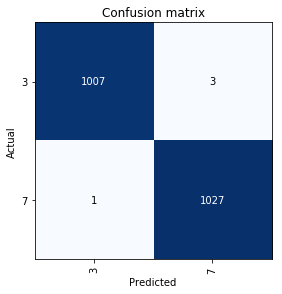

In [0]:
interp.plot_confusion_matrix()

#### Top Losses

Regardez les observations sur lesquelles vous avez fait le plus d'erreurs 

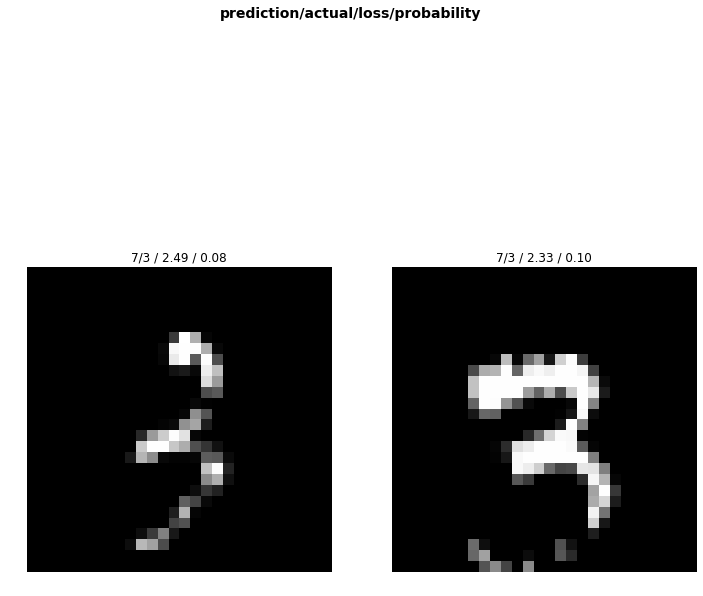

In [0]:
interp.plot_top_losses(k=2)

Il semblerait dans ce cas que le modèle a confondu des ```3``` avec des ```7```

### Raffiner un modèle 

#### Un meilleur Max Learning Rate

Maintenant que vous avez créé un modèle, il serait utile de pouvoir trouver un moyen de l'améliorer. Pour cela, on peut faire du ```fine tuning``` sur le ```learning rate```. Pour cela, le plus simple est de créer un graphique avec la suggestion du meilleur ```learning rate```

In [0]:
learner_2.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Min numerical gradient: 1.32E-06


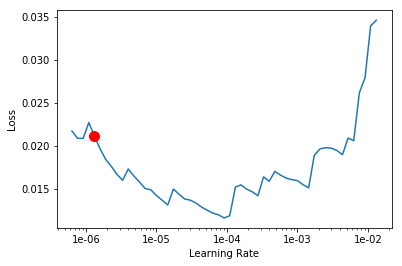

In [0]:
learner_2.recorder.plot(suggestion=True)

La valeur que nous suggère le graphique est le learning rate maximum que l'on pourrait avoir lorsque nous entrainons notre modèle. Par exemple, nous pouvons mettre 1.32E-06

In [0]:
learner_2.fit_one_cycle(2, 1.32E-06)

epoch,train_loss,valid_loss,accuracy,time
0,0.012746,0.007156,0.997547,03:09
1,0.015873,0.006920,0.998037,03:12


De manière générale, le mieux est de prendre la valeur pour laquelle nous avons la plus forte pente sur la courbe. 

#### Unfreeze 

Par défaut, vous ne pouvez pas ré-entrainer toutes les couches de votre modèle. Elles sont "gelées". Cela permet d'entrainer les dernières couches uniquement afin de mieux ajouter votre modèle. Cependant, si vous souhaitez ré-entrainer votre modèle, il est parfois utile de tout débloquer. 

In [0]:
learner.unfreeze()

In [0]:
learner.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.024876,0.008700,0.998037,03:09
1,0.008792,0.008364,0.998037,03:07


Comme vous pouvez le voir, nous avons réussi à améliorer notre modèle de manière drastique en ré-entrainant certaines couches cachées sur un Resnet18 ! Ce qui est vraiment pas loin du "State of Art"

## Ressources 

[FAST AI DOCS](https://docs.fast.ai)

[Pytorch Models](https://pytorch.org/docs/stable/torchvision/models.html)